# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [21]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [22]:
df = pd.DataFrame()
df["reviews"] = reviews
df

,reviews
0,✅ Trip Verified | The airline lost my luggage...
1,✅ Trip Verified | We booked on the BA website...
2,✅ Trip Verified | First time flying with BA b...
3,Not Verified | You can buy sandwiches and cris...
4,✅ Trip Verified | This is a two-for-one revie...
...,...
995,✅ Trip Verified | Zagreb to London and during...
996,✅ Trip Verified | I booked a round trip from ...
997,✅ Trip Verified | Toronto to LHR and LGW to T...
998,✅ Trip Verified | San Francisco to London Hea...


In [5]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df['reviews']

0      ✅ Trip Verified |  The airline lost my luggage...
1      ✅ Trip Verified |  We booked on the BA website...
2      ✅ Trip Verified |  First time flying with BA b...
3      Not Verified | You can buy sandwiches and cris...
4      ✅ Trip Verified |  This is a two-for-one revie...
                             ...                        
995    ✅ Trip Verified |  Zagreb to London and during...
996    ✅ Trip Verified |  I booked a round trip from ...
997    ✅ Trip Verified |  Toronto to LHR and LGW to T...
998    ✅ Trip Verified |  San Francisco to London Hea...
999    ✅ Trip Verified |  London to Dublin. This was ...
Name: reviews, Length: 1000, dtype: object

In [23]:
df['reviews'] = df['reviews'].str.replace('✅ Trip Verified \|', '')

C:\Users\aikyn\AppData\Local\Temp\ipykernel_11760\3024476150.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['reviews'] = df['reviews'].str.replace('✅ Trip Verified \|', '')


In [25]:
df['reviews'] = df['reviews'].str.strip()
df

,reviews
0,The airline lost my luggage and was absolutely...
1,"We booked on the BA website, round trip flight..."
2,"First time flying with BA business class, neve..."
3,Not Verified | You can buy sandwiches and cris...
4,This is a two-for-one review covering economy ...
...,...
995,Zagreb to London and during the check-in (24 h...
996,I booked a round trip from Milan to California...
997,Toronto to LHR and LGW to Toronto return in WT...
998,San Francisco to London Heathrow on the lower ...


In [26]:
import re
from gensim.parsing.preprocessing import preprocess_string

reviews = df['reviews'].tolist()

# Define custom cleaning functions
def remove_punctuation(text):
    # Remove punctuation marks using regular expression
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    return cleaned_text

# Define your own custom preprocessing steps
CUSTOM_FILTERS = [lambda x: x.lower(), remove_punctuation]
preprocessed_reviews = [preprocess_string(review, CUSTOM_FILTERS) for review in reviews]

# Join the preprocessed tokens back into cleaned reviews
cleaned_reviews = [' '.join(review) for review in preprocessed_reviews]

# Update the dataframe with cleaned reviews
df['cleaned_reviews'] = cleaned_reviews

df['cleaned_reviews']

0      the airline lost my luggage and was absolutely...
1      we booked on the ba website round trip flights...
2      first time flying with ba business class never...
3      not verified you can buy sandwiches and crisps...
4      this is a twoforone review covering economy an...
                             ...                        
995    zagreb to london and during the checkin 24 hou...
996    i booked a round trip from milan to california...
997    toronto to lhr and lgw to toronto return in wt...
998    san francisco to london heathrow on the lower ...
999    london to dublin this was an early morning dep...
Name: cleaned_reviews, Length: 1000, dtype: object

In [51]:
type(df['cleaned_reviews'][0])

str

In [55]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Stopword removal
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Punctuation removal and removing special characters
    tokens = [token for token in tokens if token.isalnum()]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Join tokens back into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text

# Example usage
#text = "This is an example sentence for text preprocessing."

for i in range (0, len(df['reviews'])):
    df['cleaned_reviews'][i] = preprocess_text(df['cleaned_reviews'][i])
df['cleaned_reviews']    

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aikyn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aikyn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\aikyn\AppData\Local\Temp\ipykernel_11760\2632524291.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_reviews'][i] = preprocess_text(df['cleaned_reviews'][i])


0      airlin lost luggag absolut aw throughout entir...
1      book ba websit round trip flight seattl amman ...
2      first time fli ba busi class never board drink...
3      verifi buy sandwich crisp dont expect hot meal...
4      twoforon review cover economi busi class ba fl...
                             ...                        
995    zagreb london checkin 24 hour check via app of...
996    book round trip milan california honeymoon fir...
997    toronto lhr lgw toronto return wt final ba mov...
998    san francisco london heathrow lower deck a380 ...
999    london dublin earli morn departur heathrow ful...
Name: cleaned_reviews, Length: 1000, dtype: object

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import corpora, models
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('punkt')

# Tokenize the reviews
reviews_list = [review.split() for review in df['cleaned_reviews']]

# Create a dictionary and document-term matrix
dictionary = corpora.Dictionary(reviews_list)
corpus = [dictionary.doc2bow(review) for review in reviews_list]

# Apply LDA topic modeling
lda_model = models.LdaModel(corpus, num_topics=1, id2word=dictionary, passes=10)

# Print the topics and their corresponding keywords
topics = lda_model.print_topics(num_topics=5, num_words=5)
for topic in topics:
    print(topic)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aikyn\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aikyn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aikyn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(0, '0.025*"flight" + 0.014*"ba" + 0.012*"seat" + 0.009*"servic" + 0.007*"london"')


In [57]:
# Sentiment Analysis
sia = SentimentIntensityAnalyzer()
df['sentiment_score'] = df['cleaned_reviews'].apply(lambda x: sia.polarity_scores(x)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

num_positive_reviews = len(df[df['sentiment_label'] == 'positive'])
num_negative_reviews = len(df[df['sentiment_label'] == 'negative'])
num_neutral_reviews = len(df[df['sentiment_label'] == 'neutral'])

print(num_positive_reviews)
print(num_negative_reviews)
print(num_neutral_reviews)

# Calculate overall sentiment statistics
sentiment_stats = df['sentiment_label'].value_counts()

609
375
16


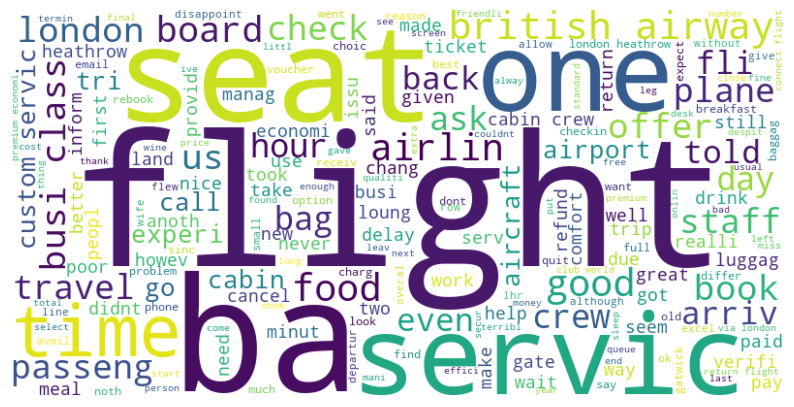

In [58]:
# Generate Word Cloud
all_reviews = ' '.join(df['cleaned_reviews'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Visualize the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [39]:
df

,reviews,cleaned_reviews,sentiment_score,sentiment_label
0,The airline lost my luggage and was absolutely...,the airline lost my luggage and was absolutely...,-0.7990,negative
1,"We booked on the BA website, round trip flight...",we booked on the ba website round trip flights...,0.7184,positive
2,"First time flying with BA business class, neve...",first time flying with ba business class never...,-0.7096,negative
3,Not Verified | You can buy sandwiches and cris...,not verified you can buy sandwiches and crisps...,-0.5849,negative
4,This is a two-for-one review covering economy ...,this is a twoforone review covering economy an...,0.9708,positive
...,...,...,...,...
995,Zagreb to London and during the check-in (24 h...,zagreb to london and during the checkin 24 hou...,-0.3404,negative
996,I booked a round trip from Milan to California...,i booked a round trip from milan to california...,-0.8254,negative
997,Toronto to LHR and LGW to Toronto return in WT...,toronto to lhr and lgw to toronto return in wt...,0.9952,positive
998,San Francisco to London Heathrow on the lower ...,san francisco to london heathrow on the lower ...,0.9824,positive
